# 非凸関数の収束しない例

---

Text(0.5, 1.0, 'Non-convex function')

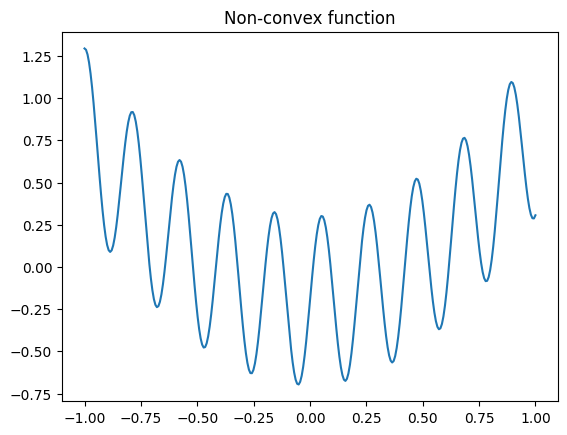

In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt


x_points = jnp.linspace(-1,1,300)

def nonconvex_f(x):
    return x ** 2 + 0.5 * jnp.sin(30 * x) - 0.2

plt.plot(x_points, nonconvex_f(x_points))
plt.title("Non-convex function")

上の関数は非凸関数なのですが，局所最適解に陥りそうな感じですね．

一般的な勾配法を用いて最適解がどうなるのか次のコードで確認していきます．

$$
\mathbf{x}^{t+1}=\mathbf{x}^t-\eta_t \cdot \nabla f\left(\mathbf{x}^t\right)
$$

Text(0.5, 1.0, 'Non-convex function')

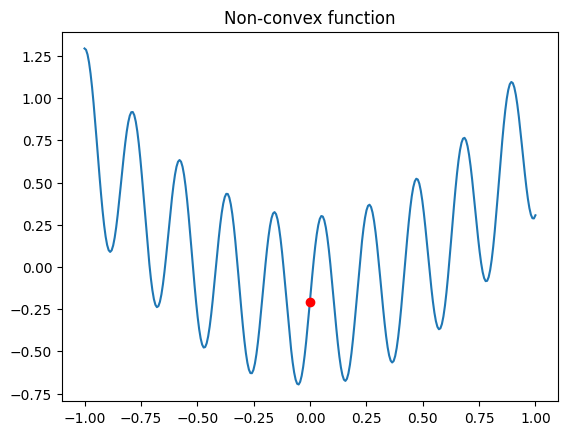

In [27]:
import jax

@jax.jit
def update_f(x:float,lr:float,T:int):

    def _backup(x):
        grad = jax.grad(nonconvex_f)(x)
        x_new = x - lr * grad
        return x_new
    body_fn = lambda i,x: _backup(x)
    return jax.lax.fori_loop(0,T,body_fn,x)

x = 0.0 #初期値
lr = 0.1 #学習率
T = 100 #更新回数

x_opt = update_f(x,lr,T) #最適解の探索

plt.plot(x_points, nonconvex_f(x_points))
plt.plot(x_opt,nonconvex_f(x_opt),'ro')
plt.title("Non-convex function")



収束しませんね．

一方凸関数では次のように収束しているので，アルゴリズム自体の間違いではなさそうですね．

Text(0.5, 1.0, 'convex function')

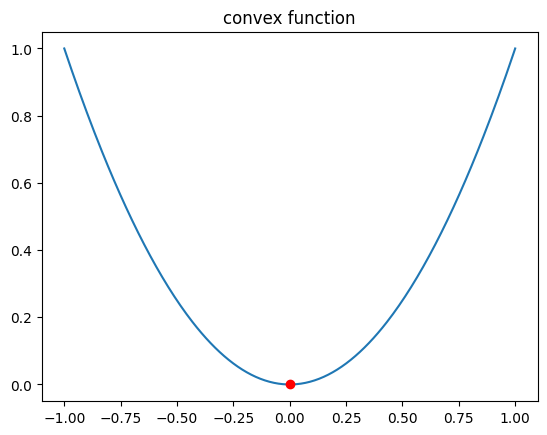

In [29]:
convex_f = lambda x: x ** 2




@jax.jit
def update_f(x:float,lr:float,T:int):

    def _backup(x):
        grad = jax.grad(convex_f)(x)
        x_new = x - lr * grad
        return x_new
    body_fn = lambda i,x: _backup(x)
    return jax.lax.fori_loop(0,T,body_fn,x)


x = 0.4 #初期値
lr = 0.1 #学習率
T = 100 #更新回数

x_opt = update_f(x,lr,T) #最適解の探索

plt.plot(x_points, convex_f(x_points))
plt.plot(x_opt,convex_f(x_opt),'ro')
plt.title("convex function")